In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Context

In [2]:
df = pd.read_csv('train.csv')
df.shape

(100000, 12)

Размер датасета 100000 рядов и 12 колонок, что превышает вместимость лайнера начала 20 века, из чего мы может сделать вывод, что это синтетический датасет.

In [3]:
df

PassengerId  Survived  Pclass                Name     Sex    Age  \
0                0         1       1    Oconnor, Frankie    male    NaN   
1                1         0       3         Bryan, Drew    male    NaN   
2                2         0       3      Owens, Kenneth    male   0.33   
3                3         0       3       Kramer, James    male  19.00   
4                4         1       3       Bond, Michael    male  25.00   
...            ...       ...     ...                 ...     ...    ...   
99995        99995         1       2         Bell, Adele  female  62.00   
99996        99996         0       2       Brown, Herman    male  66.00   
99997        99997         0       3  Childress, Charles    male  37.00   
99998        99998         0       3    Caughlin, Thomas    male  51.00   
99999        99999         0       3       Enciso, Tyler    male  55.00   

       SibSp  Parch     Ticket   Fare   Cabin Embarked  
0          2      0     209245  27.14  C12239        S  
1          0      0      27323  13.35     NaN        S  
2          1      2  CA 457703  71.29     NaN        S  
3          0      0   A. 10866  13.04     NaN        S  
4          0      0     427635   7.76     NaN        S  
...      ...    ...        ...    ...     ...      ...  
99995      0      0   PC 15008  14.86  D17243        C  
99996      0      0      13273  11.15     NaN        S  
99997      0      0        NaN   9.95     NaN        S  
99998      0      1     458654  30.92     NaN        S  
99999      0      0     458074  13.96     NaN        S  

[100000 rows x 12 columns]

# Data quality assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
# Сколько пустых ячеек в каждой колонке
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

В колонке Cabin пропущено 67,9% значений

In [6]:
# Подсчитаем сколько рядов с хотя бы одним пропущеным значением
# В колонке Cabin более 60 процентов пропущенных значений
count_missed = df.shape[0] - df.dropna().shape[0]
count_missed

69119

69119 число рядов с хотя бы одним пропущенным значением. В основном это из за столбца Cabin

<AxesSubplot:>

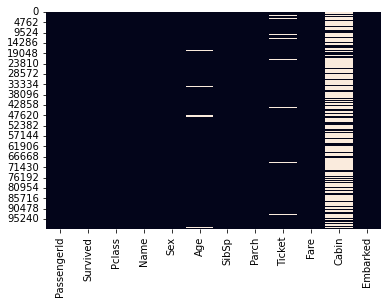

In [7]:
sns.heatmap(df.isnull(), cbar=False)

Тепловая карта визуально подтвеждает, что основной источник пропущенных значений это Cabin

In [8]:
# Преобразуем столбец Survived в тип Boolean, поскольку его смысл больше соответсвует категориальному значению
df.Survived = df.Survived.astype(bool)

# Data exploration

In [9]:
df.describe()

PassengerId         Pclass           Age          SibSp  \
count  100000.000000  100000.000000  96708.000000  100000.000000   
mean    49999.500000       2.106910     38.355472       0.397690   
std     28867.657797       0.837727     18.313556       0.862566   
min         0.000000       1.000000      0.080000       0.000000   
25%     24999.750000       1.000000     25.000000       0.000000   
50%     49999.500000       2.000000     39.000000       0.000000   
75%     74999.250000       3.000000     53.000000       1.000000   
max     99999.000000       3.000000     87.000000       8.000000   

               Parch         Fare  
count  100000.000000  99866.00000  
mean        0.454560     43.92933  
std         0.950076     69.58882  
min         0.000000      0.68000  
25%         0.000000     10.04000  
50%         0.000000     24.46000  
75%         1.000000     33.50000  
max         9.000000    744.66000

Средний класс - 2, соответсвует медиане 2. Средний возраст 38,4, так же соответсвует медиане 39 Медиана со значением 0 и средним значением 0,4 и 0,45 соответственно для колонок "Братья, сестры, супруги" и "Родители и дети" говорит о скошенности вправо. Также на скошенность вправо указывают значения колонки Fare

In [10]:
# Посмотрим на описание категориальных данных
df.astype('object').describe()

PassengerId Survived  Pclass           Name     Sex      Age   SibSp  \
count        100000   100000  100000         100000  100000  96708.0  100000   
unique       100000        2       3          92144       2    173.0       7   
top               0    False       3  Johnson, John    male     25.0       0   
freq              1    57226   41006             31   56114   2354.0   73308   

         Parch Ticket      Fare   Cabin Embarked  
count   100000  95377  99866.00   32134    99750  
unique       8  75331  15935.00   26992        3  
top          0   A/5       9.85  C19828        S  
freq     73540    602     87.00       6    72139

Здесь можно отметить наиболее часто встречающиеся характеристики. Исходя из данных по колонкам и значений самого часто встречаемого значения 'top' и его часто ты 'freq' большинство пассажиров невыжило. 41% пассажиров путешествовал третим классом. Большинство пассажиров было мужчинами. У большинства не было детей. Для большинства место посадки было Southampton. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

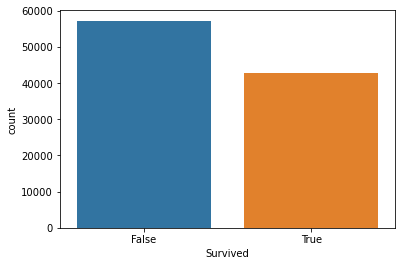

In [16]:
# Колонка выжившие - большинство не выжило
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

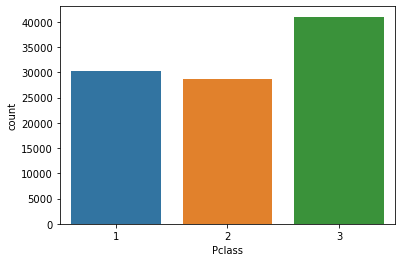

In [17]:
# Колонка Класс
sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

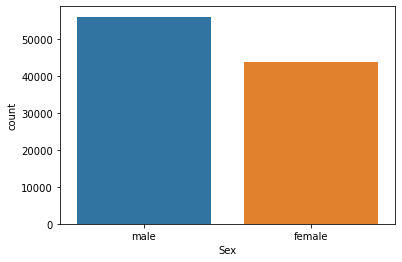

In [18]:
# Колонка Пол - большинство пассажиров было мужчины
sns.countplot(x="Sex", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

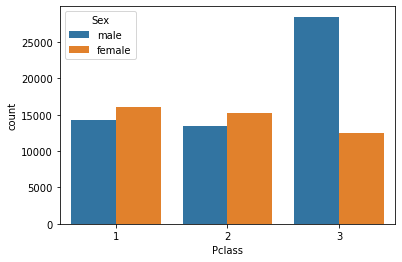

In [19]:
# Посчитатем соотношение по полу по классам
sns.countplot(x="Pclass", hue="Sex", data=df)

Соотношение по полам примерно одинаковое для первого и второго класса. В третьем классе большинство пассажиров мужчины

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

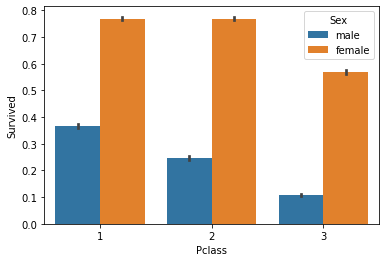

In [20]:
# Соотношение выживших по признаку пола
# Во всех классах большинство выживших это женщины
sns.barplot(x="Pclass", y='Survived',hue="Sex", data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

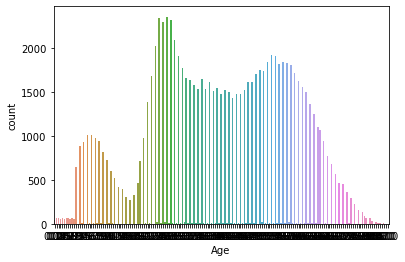

In [21]:
# Гистограмма по возрасту
sns.countplot(x="Age", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

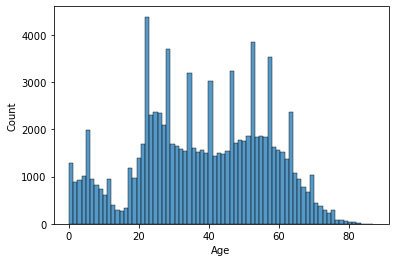

In [22]:
# Гистограмма по возрасту
sns.histplot(x="Age", data=df)

Гистогамма выглядит странно, надо посчитать значения по годам

In [23]:
age_count = df.Age.value_counts()
age_count

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
14.5       1
74.5       1
78.5       1
13.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

Подсчет по годам не превышает значения 2354. Похоже слишком мелкое разбиение искажает гистограмму

<AxesSubplot:xlabel='Age', ylabel='Count'>

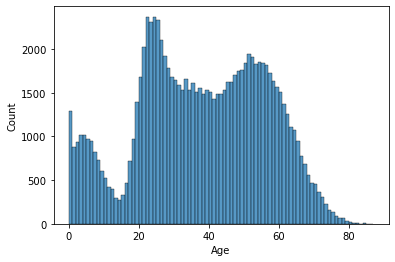

In [24]:
# Сделаем гистограмму с шириной ячейки один год
sns.histplot(x="Age", data=df, binwidth=1)

Так выглядит лучше. Остался всплекс на младенцах 0-1

In [25]:
age_count.sort_index().head(15)

0.08     39
0.17     67
0.25     68
0.33     53
0.42     62
0.50     58
0.58     62
0.67     62
0.75     57
0.83     63
0.92     51
1.00    649
1.50      2
2.00    879
2.50      7
Name: Age, dtype: int64

Значение на 1.0 вытягивает гистограмму. До года считают более дробно, тем кому больше года записывают год. В результате 0 и 1 попадают в одну корзину

<AxesSubplot:xlabel='SibSp', ylabel='count'>

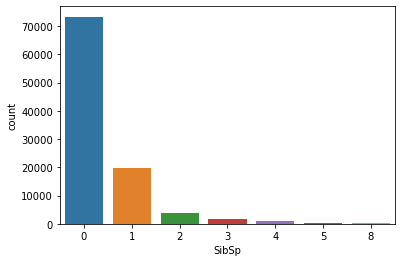

In [26]:
# Столбчатая диаграмма по критерию "братья, сестры, супруги"
sns.countplot(x='SibSp', data=df)

Большинство путешествовало в одиночку
TODO: Проверить выживаемость в зависимости от наличия родственников

<AxesSubplot:xlabel='Parch', ylabel='count'>

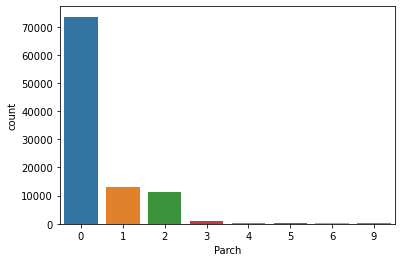

In [27]:
sns.countplot(x='Parch', data=df)

<AxesSubplot:xlabel='has_relatives', ylabel='count'>

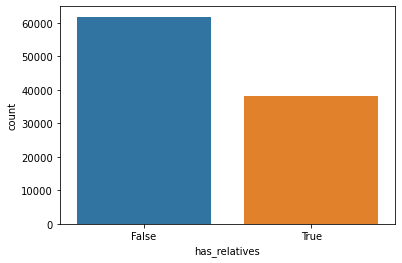

In [28]:
# Гипотеза что у людей с родственниками больше шансов выжить
df['has_relatives'] = (df.Parch > 0) | (df.SibSp >0)
sns.countplot(x='has_relatives', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

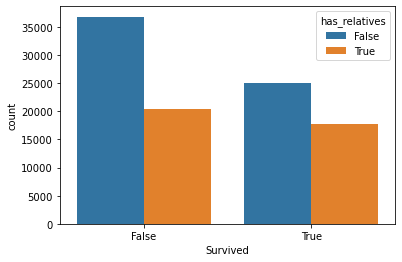

In [29]:
sns.countplot(x='Survived', hue='has_relatives', data=df)

Из тех кто не выжил у большинства не было родственников

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

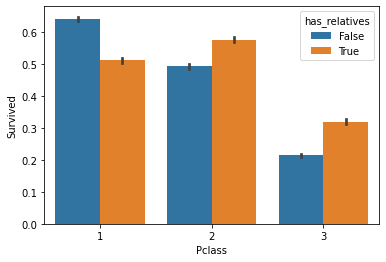

In [30]:
# Соотношение по наличию родственников по классам
sns.barplot(x="Pclass", y='Survived',hue="has_relatives", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

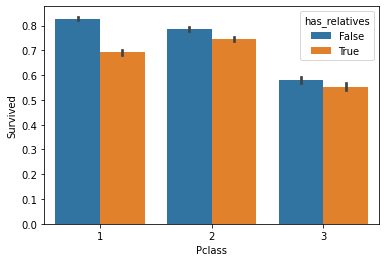

In [31]:
# Соотношение по наличию родственников по классам для женщин
dff = df[df.Sex=='female']
sns.barplot(x="Pclass", y='Survived',hue="has_relatives", data=dff)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

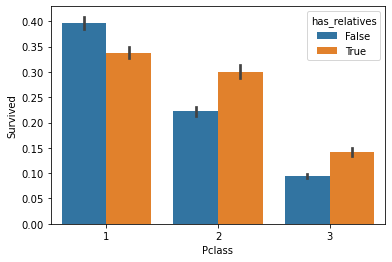

In [32]:
# Соотношение по наличию родственников по классам для мужчин
dfm = df[df.Sex=='male']
sns.barplot(x="Pclass", y='Survived',hue="has_relatives", data=dfm)

<AxesSubplot:xlabel='Fare', ylabel='count'>

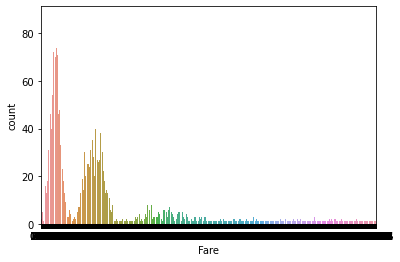

In [33]:
# Гистограмма по стоимости билета
sns.countplot(x='Fare', data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

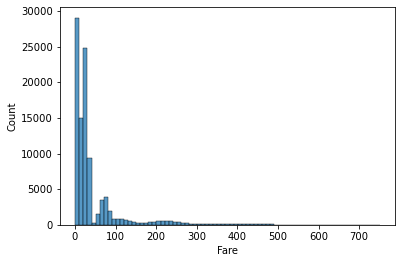

In [34]:
sns.histplot(x='Fare', data=df, binwidth=10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

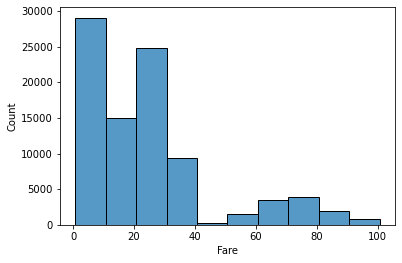

In [35]:
sns.histplot(x='Fare', data=df[df.Fare < 100], binwidth=10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

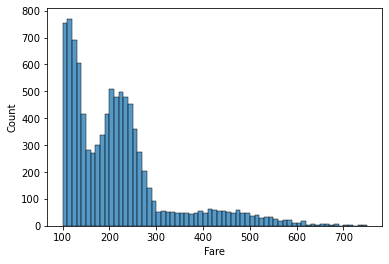

In [36]:
sns.histplot(x='Fare', data=df[df.Fare >= 100], binwidth=10)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

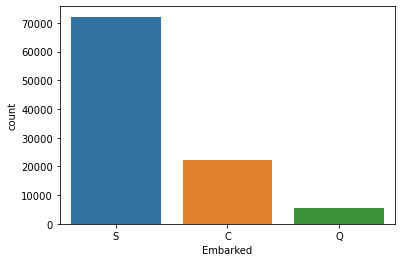

In [37]:
# Столбчатая диаграмма по месту посадки
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

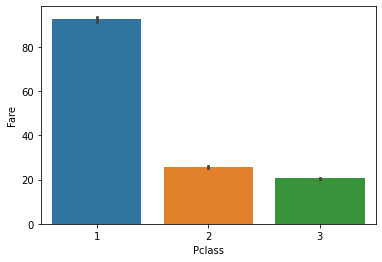

In [38]:
# Зависимость стоимости билета от класса
# Наиболее дорогие билеты ожидаемо в первом классе
sns.barplot(x="Pclass", y="Fare", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

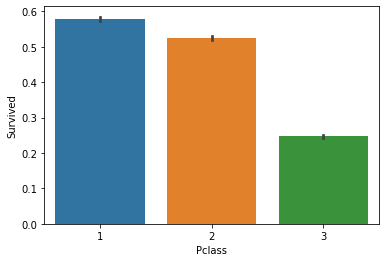

In [82]:
# Столбчатая диаграмма выжившие по классам
# Меньше всего выживших ехавших третим классом
sns.barplot(x="Pclass", y="Survived", data=df)

Разница в стоимости билета между 2 и 3 классом не большая, а разница в выживании значительная

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

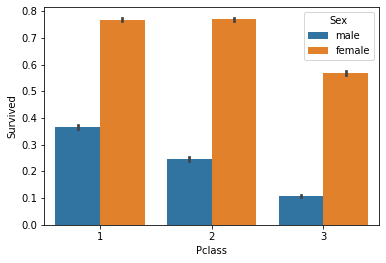

In [40]:
# Зависимость выживаемости от класса
sns.barplot(x="Pclass", y="Survived", data=df, hue="Sex")

По всем класса большинство выживших женщины

In [42]:
df.Fare = df.Fare.fillna(0)

In [43]:
df[df.Fare == 0]

PassengerId  Survived  Pclass              Name     Sex   Age  SibSp  \
39              39      True       2      Cultice, May  female  61.0      0   
1404          1404      True       1     Kerr, Maryann  female  55.0      0   
1909          1909      True       2  Thomas, Jennifer  female  22.0      0   
1999          1999     False       3    Flatley, Trena  female   3.0      1   
3885          3885      True       1  Harding, Lillian  female  48.0      1   
...            ...       ...     ...               ...     ...   ...    ...   
92227        92227      True       3    Ramsay, Miriam  female  28.0      0   
93617        93617      True       2   Hernandez, Tina  female  51.0      0   
93908        93908     False       2   Cauthen, Judith  female  34.0      0   
94656        94656     False       3  Compton, William    male  26.0      0   
97944        97944      True       3  Engleberg, Melba  female  66.0      0   

       Parch           Ticket  Fare   Cabin Embarked  has_relatives  
39         0            10193   0.0     NaN        S          False  
1404       0            15792   0.0   C5721        C          False  
1909       0            12598   0.0     NaN        Q          False  
1999       2           457224   0.0     NaN        S           True  
3885       2            14367   0.0   B7243        C           True  
...      ...              ...   ...     ...      ...            ...  
92227      0           428649   0.0     NaN        S          False  
93617      0       F.C. 31451   0.0     NaN        Q          False  
93908      0        PC 490559   0.0  D16881        C          False  
94656      0           466015   0.0     NaN        S          False  
97944      1  SC/PARIS 300188   0.0     NaN        S           True  

[134 rows x 13 columns]

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

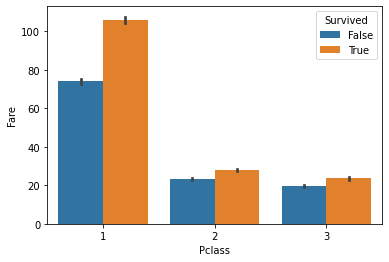

In [44]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

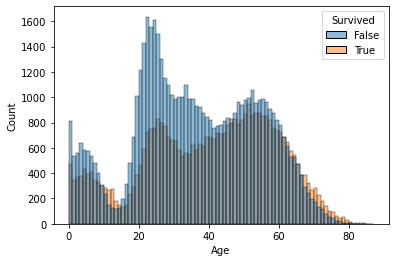

In [45]:
sns.histplot(x="Age", data=df, hue='Survived', binwidth=1)

<AxesSubplot:xlabel='Age', ylabel='Percent'>

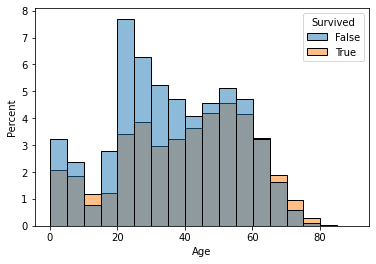

In [46]:
sns.histplot(x="Age", data=df, hue='Survived', binwidth=5, stat="percent")

In [47]:
# Поделим пассажиров на категории по возрасту
df['age_groups'] = pd.cut(df.Age, bins=30)

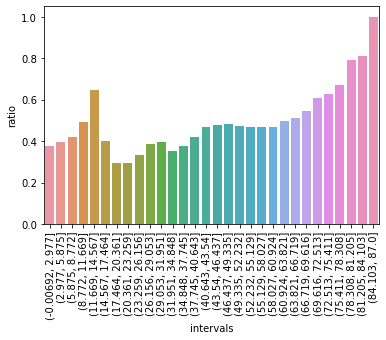

In [48]:
# Построим столбчатую диаграмму соотношения выживших к общему числу по возрастным группам
df_age = df["age_groups"].value_counts().reset_index()
df_age = df_age.rename(columns={'index': 'intervals', 'age_groups': 'counts'})
df_age_survived = df['age_groups'][df['Survived']==True].value_counts().reset_index()
df_age_survived = df_age_survived.rename(columns={'index': 'intervals', 'age_groups': 'survived_counts'})
df_s = df_age.merge(df_age_survived, on='intervals')
df_s['ratio'] = df_s.survived_counts/df_s.counts
sns.barplot(x='intervals', y='ratio', data=df_s)
ticks = plt.xticks(rotation=90)

In [49]:
df_s

intervals  counts  survived_counts     ratio
0    (23.259, 26.156]    7011             2341  0.333904
1    (20.361, 23.259]    6065             1784  0.294147
2    (26.156, 29.053]    5802             2251  0.387970
3    (52.232, 55.129]    5590             2604  0.465832
4    (49.335, 52.232]    5538             2631  0.475081
5    (55.129, 58.027]    5376             2525  0.469680
6    (46.437, 49.335]    5083             2445  0.481015
7    (31.951, 34.848]    4768             1676  0.351510
8    (34.848, 37.745]    4661             1752  0.375885
9     (43.54, 46.437]    4628             2206  0.476664
10   (37.745, 40.643]    4570             1926  0.421444
11    (40.643, 43.54]    4423             2078  0.469817
12   (60.924, 63.821]    4128             2049  0.496366
13   (29.053, 31.951]    3330             1320  0.396396
14   (58.027, 60.924]    3203             1502  0.468935
15   (63.821, 66.719]    3120             1591  0.509936
16   (17.464, 20.361]    3080              906  0.294156
17     (2.977, 5.875]    2957             1176  0.397700
18     (5.875, 8.772]    2740             1147  0.418613
19  (-0.00692, 2.977]    2179              825  0.378614
20   (66.719, 69.616]    2013             1099  0.545951
21    (8.772, 11.669]    1861              914  0.491134
22   (69.616, 72.513]    1283              780  0.607950
23   (11.669, 14.567]    1115              722  0.647534
24   (14.567, 17.464]    1065              428  0.401878
25   (72.513, 75.411]     678              425  0.626844
26   (75.411, 78.308]     294              197  0.670068
27   (78.308, 81.205]     119               94  0.789916
28   (81.205, 84.103]      21               17  0.809524
29     (84.103, 87.0]       7                7  1.000000

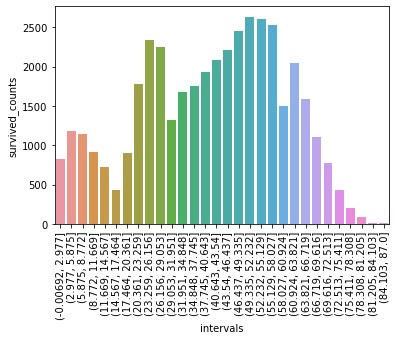

In [50]:
sns.barplot(x='intervals', y='survived_counts', data=df_s)
ticks = plt.xticks(rotation=90)

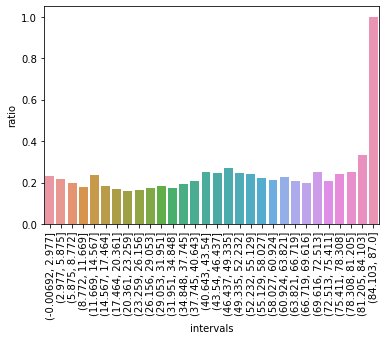

In [51]:
# Построим столбчатую диаграмму соотношения выживших к общему числу по возрастным группам для мужчин
df_male_s = df[df.Sex == 'male']
df_age = df_male_s["age_groups"].value_counts().reset_index()
df_age = df_age.rename(columns={'index': 'intervals', 'age_groups': 'counts'})

df_age_survived = df_male_s['age_groups'][df_male_s['Survived']==True].value_counts().reset_index()
df_age_survived = df_age_survived.rename(columns={'index': 'intervals', 'age_groups': 'survived_counts'})
df_s = df_age.merge(df_age_survived, on='intervals')
df_s['ratio'] = df_s.survived_counts/df_s.counts
sns.barplot(x='intervals', y='ratio', data=df_s)
ticks = plt.xticks(rotation=90)

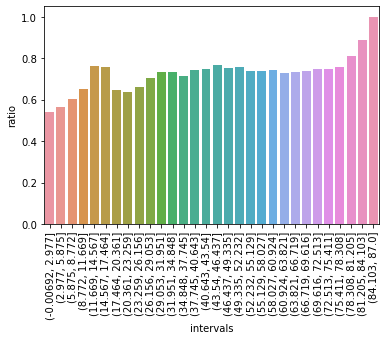

In [53]:
# Построим столбчатую диаграмму соотношения выживших к общему числу по возрастным группам для женщин
df_female_s = df[df.Sex == 'female']
df_age = df_female_s["age_groups"].value_counts().reset_index()
df_age = df_age.rename(columns={'index': 'intervals', 'age_groups': 'counts'})
df_age_survived = df_female_s['age_groups'][df_female_s['Survived']==True].value_counts().reset_index()
df_age_survived = df_age_survived.rename(columns={'index': 'intervals', 'age_groups': 'survived_counts'})
df_s = df_age.merge(df_age_survived, on='intervals')
df_s['ratio'] = df_s.survived_counts/df_s.counts
sns.barplot(x='intervals', y='ratio', data=df_s)
ticks = plt.xticks(rotation=90)

Девочки даже в младшей возрастной группе выжили лучше чем мальчики

In [55]:
# Выжившие в старшей возрастной группе
df[df.Age > 84]

PassengerId  Survived  Pclass               Name     Sex   Age  SibSp  \
17667        17667      True       3   Merritt, Colleen  female  85.0      0   
47612        47612      True       2    Fowler, Chasity  female  85.0      0   
55085        55085      True       2     Steelman, Rose  female  87.0      0   
60877        60877      True       2      Ashley, Billy    male  85.0      0   
61780        61780      True       2  Williams, Chelsea  female  86.0      0   
64456        64456      True       2      Fulton, Debra  female  85.0      0   
66300        66300      True       2       Fulmer, Jean  female  86.0      0   

       Parch    Ticket   Fare  Cabin Embarked  has_relatives      age_groups  
17667      1  PP 10297  14.73  G6187        C           True  (84.103, 87.0]  
47612      0       NaN  24.06    NaN        S          False  (84.103, 87.0]  
55085      2     27657  35.80    NaN        C           True  (84.103, 87.0]  
60877      0     C.A.   11.03    NaN        S          False  (84.103, 87.0]  
61780      0     14693  37.59    NaN        C          False  (84.103, 87.0]  
64456      0     43857  11.00    NaN        S          False  (84.103, 87.0]  
66300      0    424031   7.05    NaN        C          False  (84.103, 87.0]

<AxesSubplot:xlabel='Age', ylabel='Fare'>

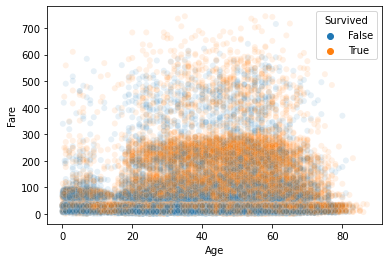

In [57]:
sns.scatterplot(data=df, x="Age", y="Fare", hue='Survived', alpha=0.1)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

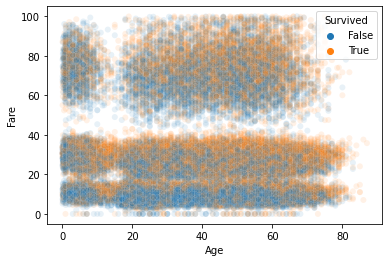

In [58]:
sns.scatterplot(x=df["Age"], y=df["Fare"][df['Fare']<100], hue=df['Survived'], alpha=0.1)

In [60]:
# Преобразование датасета для построения корелляции
dfdum = df.drop(columns=['Name', 'Ticket', 'Cabin', 'age_groups', 'PassengerId'])
dfdum = pd.get_dummies(dfdum)
dfdum

Survived  Pclass    Age  SibSp  Parch   Fare  has_relatives  \
0          True       1    NaN      2      0  27.14           True   
1         False       3    NaN      0      0  13.35          False   
2         False       3   0.33      1      2  71.29           True   
3         False       3  19.00      0      0  13.04          False   
4          True       3  25.00      0      0   7.76          False   
...         ...     ...    ...    ...    ...    ...            ...   
99995      True       2  62.00      0      0  14.86          False   
99996     False       2  66.00      0      0  11.15          False   
99997     False       3  37.00      0      0   9.95          False   
99998     False       3  51.00      0      1  30.92           True   
99999     False       3  55.00      0      0  13.96          False   

       Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0               0         1           0           0           1  
1               0         1           0           0           1  
2               0         1           0           0           1  
3               0         1           0           0           1  
4               0         1           0           0           1  
...           ...       ...         ...         ...         ...  
99995           1         0           1           0           0  
99996           0         1           0           0           1  
99997           0         1           0           0           1  
99998           0         1           0           0           1  
99999           0         1           0           0           1  

[100000 rows x 12 columns]

In [61]:
dfdum.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived       1.000000 -0.289723  0.103895 -0.007587  0.023352  0.187310   
Pclass        -0.289723  1.000000 -0.259109 -0.051436 -0.041848 -0.416955   
Age            0.103895 -0.259109  1.000000 -0.112459 -0.125535  0.109056   
SibSp         -0.007587 -0.051436 -0.112459  1.000000  0.213126  0.059403   
Parch          0.023352 -0.041848 -0.125535  0.213126  1.000000  0.061377   
Fare           0.187310 -0.416955  0.109056  0.059403  0.061377  1.000000   
has_relatives  0.060086 -0.137552 -0.121511  0.587090  0.609236  0.122761   
Sex_female     0.507260 -0.198617  0.081684  0.030627  0.087666  0.143417   
Sex_male      -0.507260  0.198617 -0.081684 -0.030627 -0.087666 -0.143417   
Embarked_C     0.349209 -0.288068  0.101906 -0.019017  0.014203  0.211657   
Embarked_Q     0.081917 -0.184565  0.153130 -0.030716 -0.007879  0.101239   
Embarked_S    -0.365716  0.360727 -0.172093  0.033464 -0.009520 -0.247815   

               has_relatives  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
Survived            0.060086    0.507260 -0.507260    0.349209    0.081917   
Pclass             -0.137552   -0.198617  0.198617   -0.288068   -0.184565   
Age                -0.121511    0.081684 -0.081684    0.101906    0.153130   
SibSp               0.587090    0.030627 -0.030627   -0.019017   -0.030716   
Parch               0.609236    0.087666 -0.087666    0.014203   -0.007879   
Fare                0.122761    0.143417 -0.143417    0.211657    0.101239   
has_relatives       1.000000    0.109844 -0.109844    0.030586   -0.016279   
Sex_female          0.109844    1.000000 -1.000000    0.293367    0.130933   
Sex_male           -0.109844   -1.000000  1.000000   -0.293367   -0.130933   
Embarked_C          0.030586    0.293367 -0.293367    1.000000   -0.127877   
Embarked_Q         -0.016279    0.130933 -0.130933   -0.127877    1.000000   
Embarked_S         -0.020658   -0.339000  0.339000   -0.859231   -0.385351   

               Embarked_S  
Survived        -0.365716  
Pclass           0.360727  
Age             -0.172093  
SibSp            0.033464  
Parch           -0.009520  
Fare            -0.247815  
has_relatives   -0.020658  
Sex_female      -0.339000  
Sex_male         0.339000  
Embarked_C      -0.859231  
Embarked_Q      -0.385351  
Embarked_S       1.000000

<AxesSubplot:>

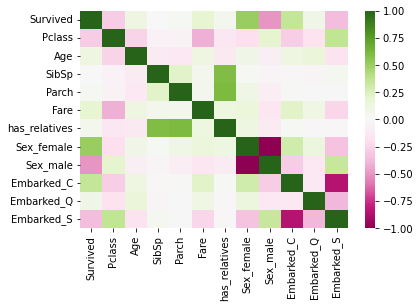

In [62]:
# Тепловая карта по коэффициенту корелляции
sns.heatmap(dfdum.corr(), cmap="PiYG")

Наибольшее положительное влияние оказывает пол женский и посадка в порту C. Наибольшее отрицательное влияние пол мужской и посадка в порту S

In [63]:
# Преобразование датасета для построения корелляции для женщин
dfd = df[df['Sex'] == 'female']
dfdum_fem = dfd.drop(columns=['Name', 'Ticket', 'Cabin', 'age_groups', 'PassengerId', 'Sex'])
dfdum_fem = pd.get_dummies(dfdum_fem)
dfdum_fem

Survived  Pclass   Age  SibSp  Parch    Fare  has_relatives  \
7          True       3   6.0      1      2   31.50           True   
14         True       1  44.0      0      1   28.40           True   
15         True       3  57.0      0      0    9.31          False   
19         True       1  61.0      0      4  205.01           True   
20        False       3  17.0      0      0    8.28          False   
...         ...     ...   ...    ...    ...     ...            ...   
99989      True       1  64.0      0      1   31.66           True   
99990      True       3  15.0      0      0   10.92          False   
99992      True       2  58.0      0      0   30.53          False   
99993      True       3  17.0      0      0    4.06          False   
99995      True       2  62.0      0      0   14.86          False   

       Embarked_C  Embarked_Q  Embarked_S  
7               0           0           1  
14              1           0           0  
15              0           0           1  
19              0           1           0  
20              0           0           1  
...           ...         ...         ...  
99989           1           0           0  
99990           0           0           1  
99992           1           0           0  
99993           0           0           1  
99995           1           0           0  

[43886 rows x 10 columns]

<AxesSubplot:>

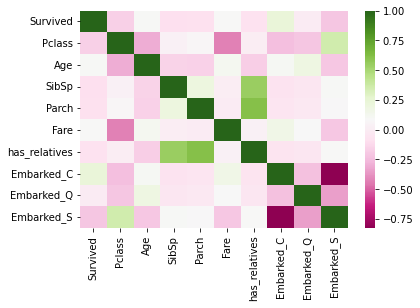

In [64]:
# Тепловая карта по коэффициентам корелляции для женщин
sns.heatmap(dfdum_fem.corr(), cmap="PiYG")

Наибольшее положительное влияние для женщин посадка в порту C. Наибольшее отрицательное влияние посадка в порту S

In [65]:
# Преобразование датасета для построения корелляции для мужчин
dfd = df[df['Sex'] == 'male']
dfdum_male = dfd.drop(columns=['Name', 'Ticket', 'Cabin', 'age_groups', 'PassengerId', 'Sex'])
dfdum_male = pd.get_dummies(dfdum_male)
dfdum_male

Survived  Pclass    Age  SibSp  Parch   Fare  has_relatives  \
0          True       1    NaN      2      0  27.14           True   
1         False       3    NaN      0      0  13.35          False   
2         False       3   0.33      1      2  71.29           True   
3         False       3  19.00      0      0  13.04          False   
4          True       3  25.00      0      0   7.76          False   
...         ...     ...    ...    ...    ...    ...            ...   
99994     False       2  36.00      0      0  12.14          False   
99996     False       2  66.00      0      0  11.15          False   
99997     False       3  37.00      0      0   9.95          False   
99998     False       3  51.00      0      1  30.92           True   
99999     False       3  55.00      0      0  13.96          False   

       Embarked_C  Embarked_Q  Embarked_S  
0               0           0           1  
1               0           0           1  
2               0           0           1  
3               0           0           1  
4               0           0           1  
...           ...         ...         ...  
99994           0           0           1  
99996           0           0           1  
99997           0           0           1  
99998           0           0           1  
99999           0           0           1  

[56114 rows x 10 columns]

<AxesSubplot:>

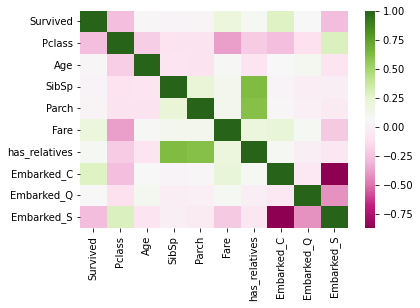

In [66]:
# Тепловая карта по коэфициенту корреляции для мужчик
sns.heatmap(dfdum_male.corr(), cmap="PiYG")

Наибольшее положительное влияние для мужчин оказывает посадка в порту C и стоимость билета. Наибольшее отрицательное влияние порту S и класс

In [68]:
df_Emb_C =df[df.Embarked == 'C']

<AxesSubplot:xlabel='Survived', ylabel='count'>

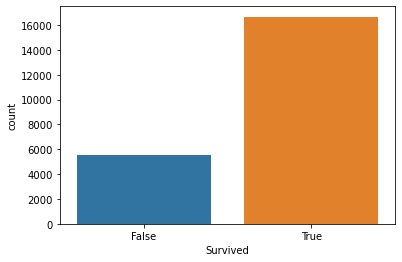

In [69]:
# Выжившие пассажиры с портом посадки С
# Процент выживших среди этих пассажиров больше, чем в среднем
sns.countplot(x="Survived", data=df_Emb_C)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

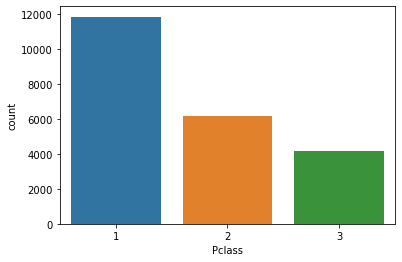

In [70]:
# Среди севших в порту С больше доля пассажиров 1 класса в  отличии от средних показателей и мельше второго и третьего
# Возможно этим и больший процент женщин объясняет их лучшую выживаемость
sns.countplot(x="Pclass", data=df_Emb_C)

<AxesSubplot:xlabel='Sex', ylabel='count'>

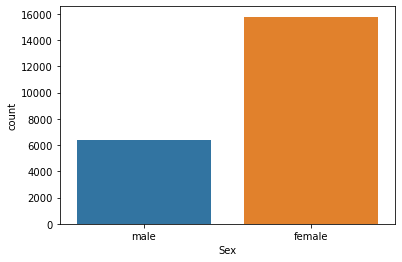

In [71]:
sns.countplot(x="Sex", data=df_Emb_C)

<AxesSubplot:xlabel='has_relatives', ylabel='count'>

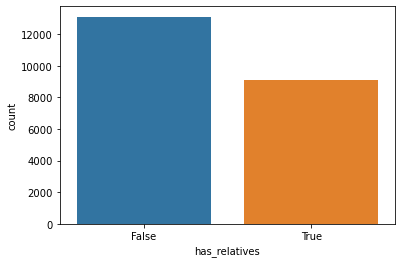

In [73]:
sns.countplot(x="has_relatives", data=df_Emb_C)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

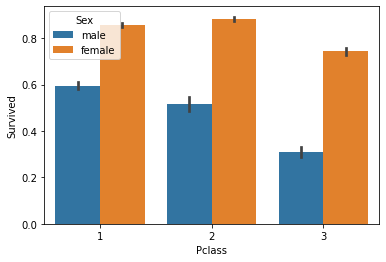

In [74]:
sns.barplot(x="Pclass", y='Survived',hue="Sex", data=df_Emb_C)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

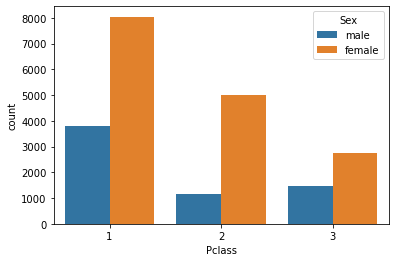

In [75]:
sns.countplot(x="Pclass", hue="Sex", data=df_Emb_C)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

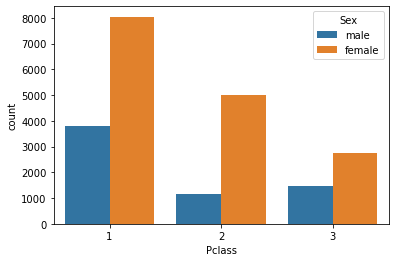

In [84]:
sns.countplot(x="Pclass", hue="Sex", data=df_Emb_C)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

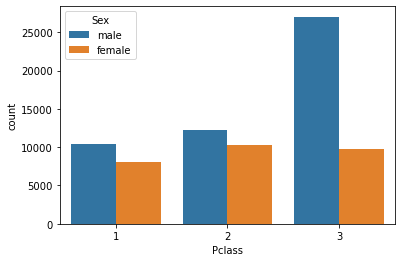

In [76]:
# Столбчатая диаграмма с разделением по классам и полу среди пассажиров севших в портах отличных от С
# Картина значительно отличается от пассажиров порта С
sns.countplot(x="Pclass", hue="Sex", data=df[df.Embarked != 'C'])

<AxesSubplot:>

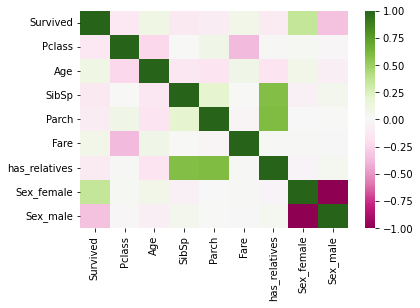

In [77]:
# Тепловая карта корреляций для пассажиров порта С
dfdum_Emb_C = df_Emb_C.drop(columns=['Name', 'Ticket', 'Cabin', 'age_groups', 'PassengerId', 'Embarked'])
dfdum_Emb_C = pd.get_dummies(dfdum_Emb_C)
sns.heatmap(dfdum_Emb_C.corr(), cmap="PiYG")

Наибольшую положительную корреляцию показывает пол женский, возраст и стоимость билета. Наибольшую отрицательную показывает пол женский.

In [78]:
dfdum_Emb_C.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived       1.000000 -0.125204  0.094116 -0.122978 -0.098375  0.076155   
Pclass        -0.125204  1.000000 -0.238446  0.007607  0.080830 -0.378826   
Age            0.094116 -0.238446  1.000000 -0.137989 -0.148716  0.079111   
SibSp         -0.122978  0.007607 -0.137989  1.000000  0.201343  0.007324   
Parch         -0.098375  0.080830 -0.148716  0.201343  1.000000 -0.026368   
Fare           0.076155 -0.378826  0.079111  0.007324 -0.026368  1.000000   
has_relatives -0.116316  0.010990 -0.158866  0.582885  0.594841  0.010854   
Sex_female     0.346602  0.017482  0.076106 -0.058795 -0.007453  0.010806   
Sex_male      -0.346602 -0.017482 -0.076106  0.058795  0.007453 -0.010806   

               has_relatives  Sex_female  Sex_male  
Survived           -0.116316    0.346602 -0.346602  
Pclass              0.010990    0.017482 -0.017482  
Age                -0.158866    0.076106 -0.076106  
SibSp               0.582885   -0.058795  0.058795  
Parch               0.594841   -0.007453  0.007453  
Fare                0.010854    0.010806 -0.010806  
has_relatives       1.000000   -0.038261  0.038261  
Sex_female         -0.038261    1.000000 -1.000000  
Sex_male            0.038261   -1.000000  1.000000

<AxesSubplot:>

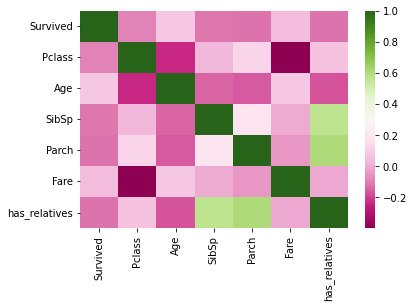

In [88]:
# Подготовка данных для расчета корреляции по пассажирам порта С с выборкой по женщинам
dfdum_Emb_C = df_Emb_C[df_Emb_C.Sex == 'female']
dfdum_Emb_C = dfdum_Emb_C.drop(columns=['Name', 'Ticket', 'Cabin', 'age_groups', 'PassengerId', 'Embarked', 'Sex'])
dfdum_Emb_C = pd.get_dummies(dfdum_Emb_C)

sns.heatmap(dfdum_Emb_C.corr(), cmap="PiYG")

In [89]:
df_Emb_C[df_Emb_C.Sex == 'female'].corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId       1.000000 -0.001642  0.004916 -0.011596 -0.000868 -0.001964   
Survived         -0.001642  1.000000 -0.087137  0.079002 -0.117886 -0.120483   
Pclass            0.004916 -0.087137  1.000000 -0.235325  0.031851  0.125600   
Age              -0.011596  0.079002 -0.235325  1.000000 -0.143477 -0.161008   
SibSp            -0.000868 -0.117886  0.031851 -0.143477  1.000000  0.196393   
Parch            -0.001964 -0.120483  0.125600 -0.161008  0.196393  1.000000   
Fare             -0.013025  0.041651 -0.398526  0.077740 -0.000458 -0.046940   
has_relatives     0.007081 -0.122348  0.061361 -0.170912  0.558779  0.601352   

                   Fare  has_relatives  
PassengerId   -0.013025       0.007081  
Survived       0.041651      -0.122348  
Pclass        -0.398526       0.061361  
Age            0.077740      -0.170912  
SibSp         -0.000458       0.558779  
Parch         -0.046940       0.601352  
Fare           1.000000      -0.009402  
has_relatives -0.009402       1.000000

# Summary

Исходя из данных датасета, женщин выжило больше не смотря на классы. 
Также есть корреляция с выживанием между классом (чем выше класс тем лучше выживание), портом посадки (лучшие показатели выживания у пассажиров порта С),